In [135]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
agents = 100
threshold = 60
strategies = 10
memory = 8
n_iter = 200

In [18]:
def make_strategies(rng, strategies, memory):
    return rng.normal(size=(strategies,memory))

In [124]:
rng = np.random.default_rng(23)

# each row is a strategy
strats = [
    make_strategies(rng, strategies, memory + 1) for _ in range(agents)
]

start = rng.uniform(agents, size=(memory*2))

# weekly attendance count
hist = np.hstack([start, np.zeros(n_iter)]).astype(int)

# index of week
# we need some starting history to begin making selections
t = memory * 2

# record choice of strategy on each iteration
best_strats = np.zeros((agents, len(hist)))

# record each agent's prediction on each iteration
pred_history = np.zeros((agents, len(hist)))

windows = np.vstack([
    hist[t-memory-i: t-i]
    for i in range(memory)
])

# each column is a memory window.
# the rightmost column is the most recent
windows = np.vstack([windows, np.ones(shape=(1, memory), dtype=int)])

while t < memory * 2 + n_iter:
    for agent in range(agents):
        strat = strats[agent]
        # each row is a strategy
        # each column is the predicted attendance for week t-i
        predictions = strat.dot(windows)
        observations = windows[0, :]
        errs = np.abs(predictions - observations).sum(axis=1)

        best_strat = np.argmin(errs)
        best_strats[agent, t] = best_strat

        pred = strat[best_strat].dot(windows[:,-1])
        pred_history[agent, t] = pred
    
    hist[t] = (pred_history[:, t] > threshold).sum()
    t += 1

In [136]:
hist

array([98,  6, 49,  7, 29, 19, 73, 96, 95, 99, 81, 21, 41, 27, 62, 35, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39])

In [130]:
best_strats[:, -1] == best_strats[:, -10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

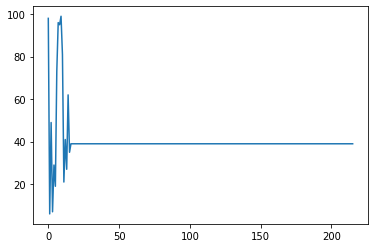

In [137]:
plt.plot(hist)